In [1]:
import re
import os
import sys
from linecache import getline
from gurobipy import Model, GRB, quicksum
from pathlib import Path

sys.path.append(str(Path(os.getcwd()).parent) + '\Modules\py')

In [2]:
import Solver as solver, PathFinder as pf, FileParser as fp

INSTANCE:  E-n23-k3.txt
Academic license - for non-commercial use only - expires 2021-05-20
Using license file C:\Users\BigBadBraddy\gurobi.lic
Changed value of parameter MIPGap to 0.0
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter PoolSearchMode to 2
   Prev: 0  Min: 0  Max: 2  Default: 0
Changed value of parameter PoolGap to 0.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 552 rows, 551 columns and 2444 nonzeros
Model fingerprint: 0x0f65c984
Variable types: 22 continuous, 529 integer (529 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Objective range  [4e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+03]
Presolve removed 54 rows and 10 columns
Presolve time: 0.00s
Presolved: 498 rows, 541 columns, 2350 nonzeros
Variable types: 22 continuous, 519 in

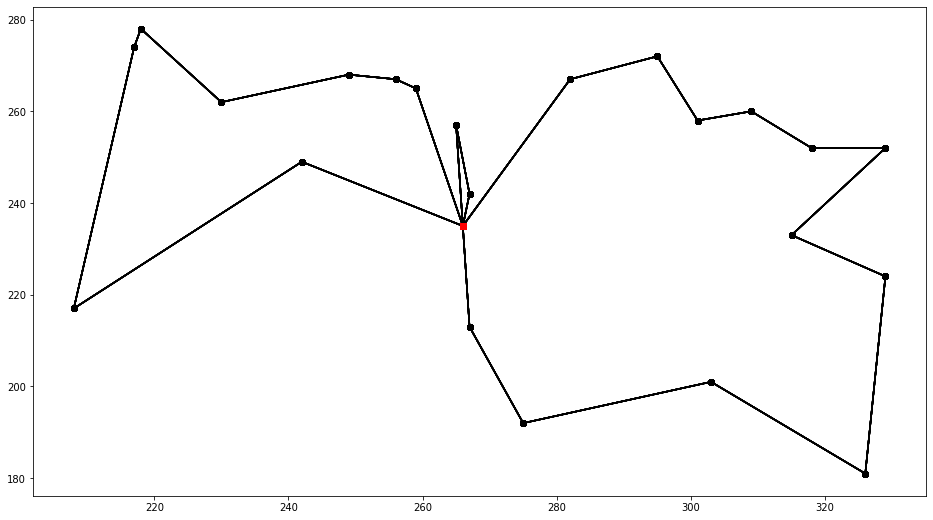

In [3]:
def solve(is_pruned):
    path = "../Instances/Instances - Prune/"
    instances = fp.get_instances("../Instances/Instances - Prune/")

    for instance in instances:
        print("INSTANCE: ", instance)
        path += instance
        lp_relaxation, reduced_cost, active_arcs, cost = solver.solve(path, is_pruned=is_pruned)
        file_name = instance[:len(instance) - 4] + "-solution.txt"
        pf.create_solution_file(active_arcs, cost, file_name)
        print()